# Objective
### The intention is to identify which segments of the data are more likely to say yes to a term deposit with the bank, depending on variables related to population demographics such as age, marital status, education level and job. 

In [2]:
#install seaborn library for charts
!pip install git+https://github.com/mwaskom/seaborn.git

  Cloning https://github.com/mwaskom/seaborn.git to /tmp/pip-req-build-4c54f6x2
  Running command git clone -q https://github.com/mwaskom/seaborn.git /tmp/pip-req-build-4c54f6x2
  Stored in directory: /tmp/pip-ephem-wheel-cache-w6jitk1i/wheels/4e/57/af/138c7bf2390a67f7010588cf080fb8b4e741bb290c2ad12018
Successfully built seaborn
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


### We will start with uploading bank telemarketing data from below link. Download the *bank-additional-full.csv* from the link
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#upload the bank-additional-full.csv file in google colab

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank-additional-full.csv to bank-additional-full.csv
User uploaded file "bank-additional-full.csv" with length 4928744 bytes


### Import libraries and defining the dataset as "bank"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings

sns.set(rc={'figure.figsize':(15,8)})

bank = pd.read_csv('bank-additional-full.csv')
bank.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### The dataset has 21 columns and 4118 rows

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#Identifying which variables are most correlated with 'y'
### We create a heatmap to identify which variables have the highest correlation with 'y' which is yes/ no to a bank term deposit


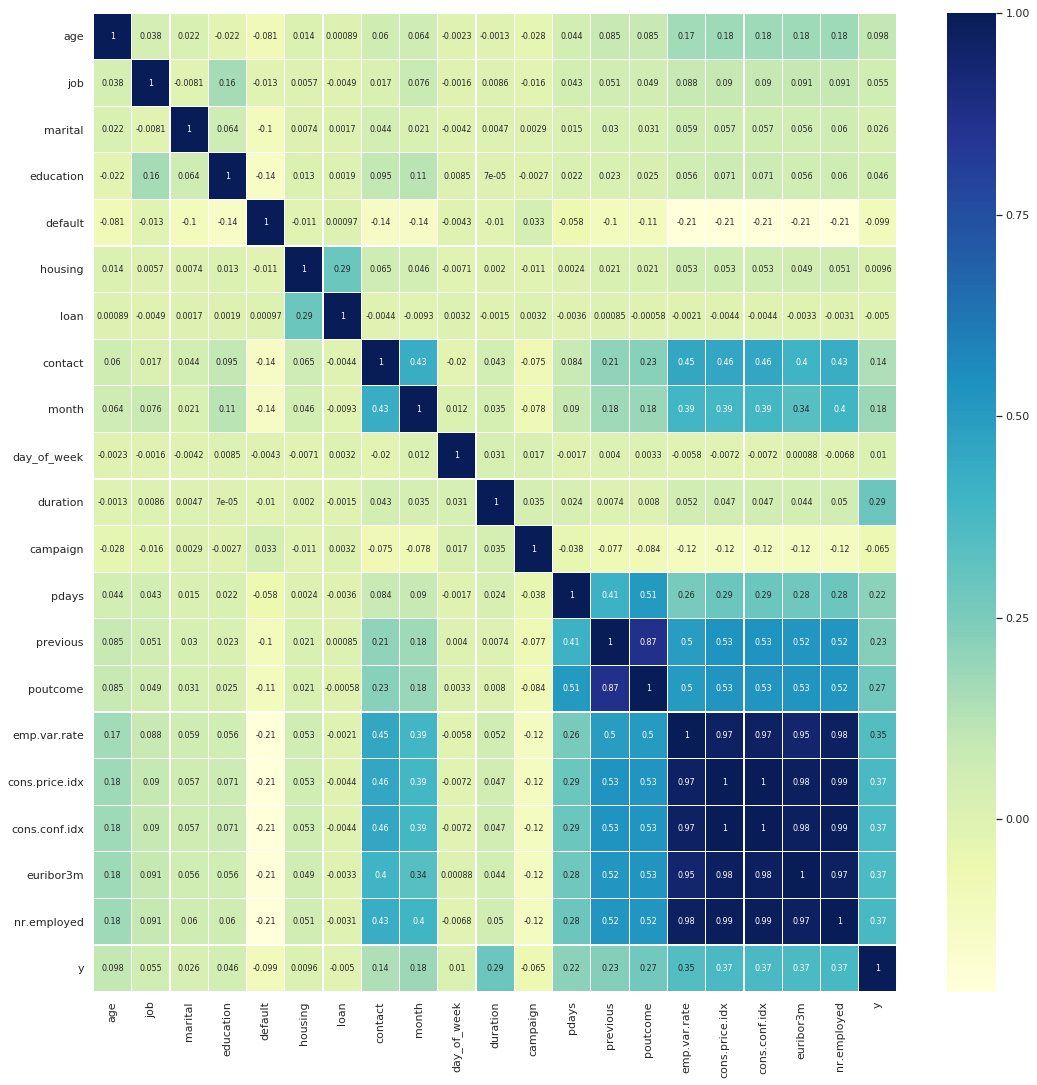

In [0]:
plt.figure(figsize=(18, 18))
corr = bank.apply(lambda x: pd.factorize(x)[0]).corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, annot_kws={"size": 8}, linewidths=.2, cmap="YlGnBu")

## We dropped attributes related to economic factors.
####Economic factors wouldn't affect the population we are targettgin in our objective. Furthermore, the economic attributes factors are highly correlated with 'y,' thereby diluting the correlation of the other features.  It it likely that the bank will get more 'yes' to bank term deposits when the economy is good.
####we created a subset of bank dataset so that we are not losing any data.

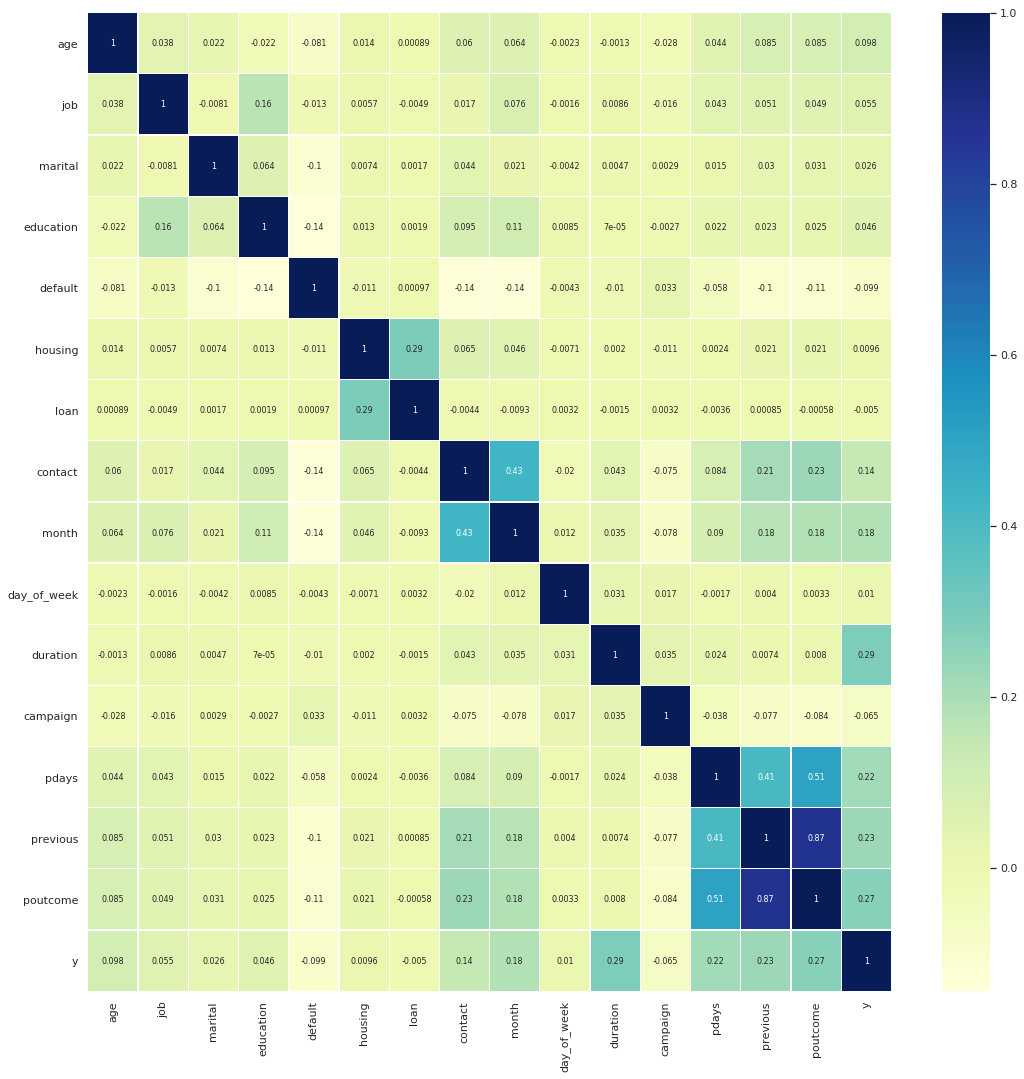

In [0]:
plt.figure(figsize=(18, 18))
bank_subset = bank.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis=1)
corr2 = bank_subset.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, annot=True, annot_kws={"size": 8}, linewidths=.2, cmap="YlGnBu")

# Visualizing remaining data to identify patterns
### We start by creating pair plots to find any patterns between the attributes from the dataset. 

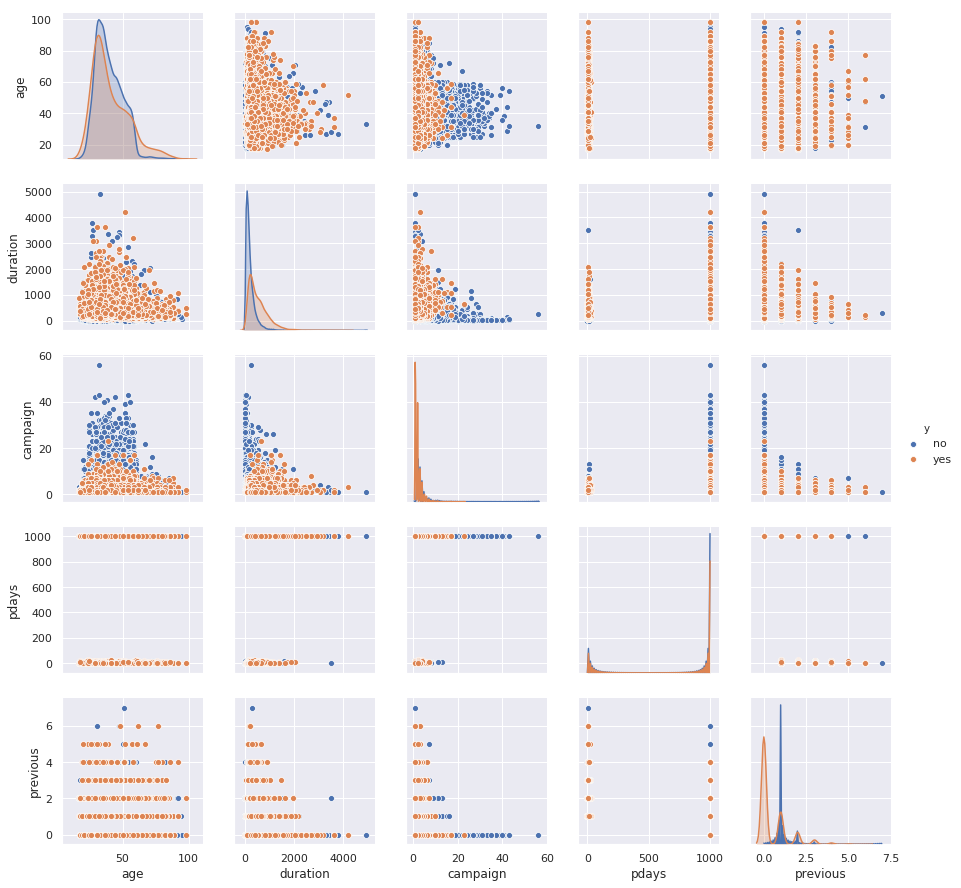

In [0]:
sns.pairplot(bank_subset, hue='y');

### We can see few patterns from our pairplot. Below columns seems to have impact on y
*   duration
*   age
*   campaign

### We also know that few columns such as marital status are not available in above pairplot, so we will create dummies for them. We will start with marital status first. To preserve the original dataset bank_subset we will create a new dataset bank_subset_marital

In [0]:
bank_subset_marital = pd.get_dummies(bank_subset, columns=['marital'])
bank_subset_marital.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single,marital_unknown
0,56,housemaid,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no,0,1,0,0
1,57,services,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no,0,1,0,0
2,37,services,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no,0,1,0,0
3,40,admin.,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no,0,1,0,0
4,56,services,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no,0,1,0,0


### We explored marital status by count. 
### *FINDING: there are more married people than singles or divorced campaign*

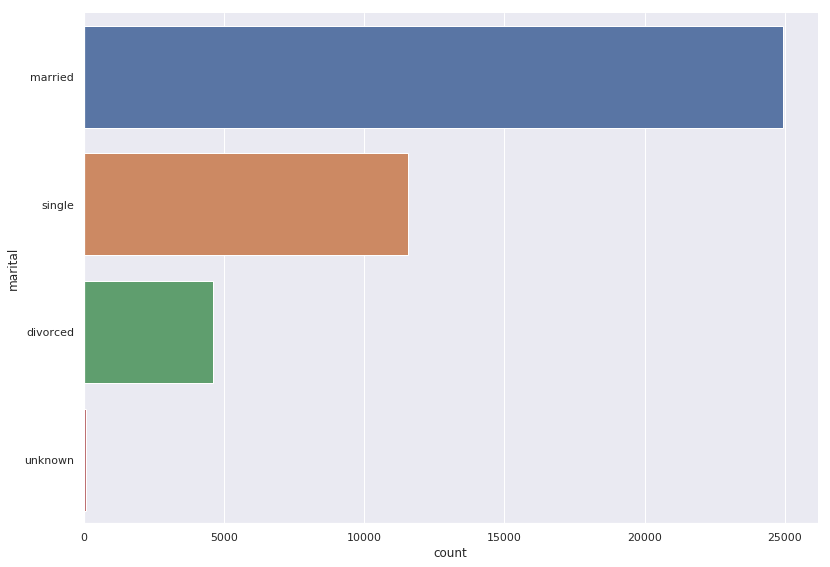

In [0]:
#Explore marital statuses by count 
sns.catplot(y="marital", kind="count", data=bank, height=7.8, aspect=1.5)

###We create a relplot for 'campaign' and 'age' to find any correlation.

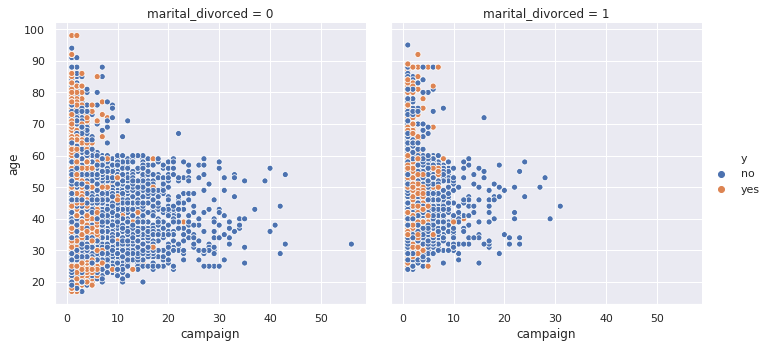

In [0]:
sns.relplot("campaign", "age", data=bank_subset_marital, hue='y', col='marital_divorced');

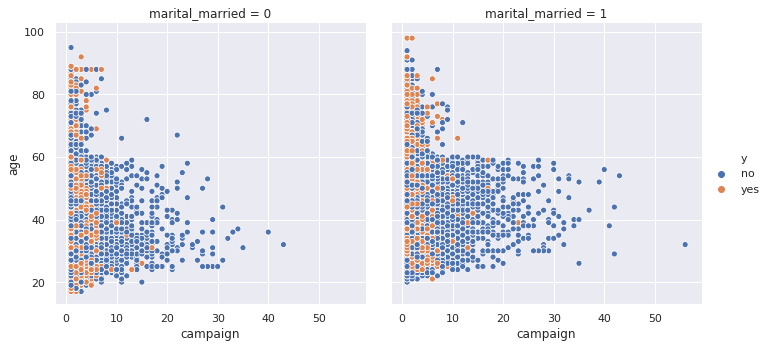

In [0]:
sns.relplot("campaign", "age", data=bank_subset_marital, hue='y', col='marital_married');

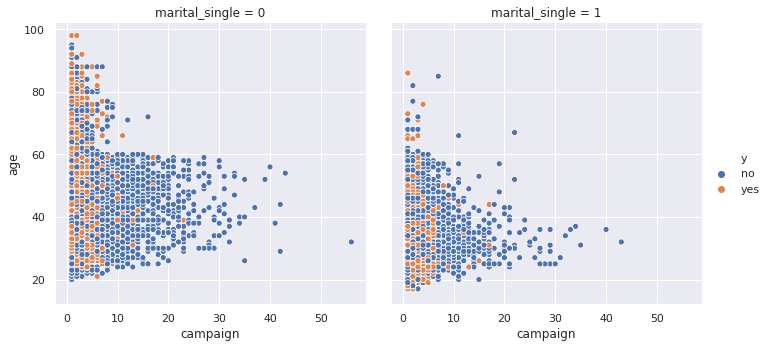

In [0]:
sns.relplot("campaign", "age", data=bank_subset_marital, hue='y', col='marital_single');

### As we cannot find any patterns between 'age' and 'campaign', we will look into some other column. 

In [0]:
# Created a barplot function which will be used used to display barplot
def barplot_percentages(feature, dataset, orient='v', axis_name="percentage of customers"):
    g = dataset.groupby(feature)["y"].value_counts().to_frame()
    g = g.rename({"y": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(dataset)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='y', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='y', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

### *FINDING: We find that if number of times the bank has reached out to a customer is less than 7, customers are most likely to say 'yes'. However it seems like a correlation not causation*

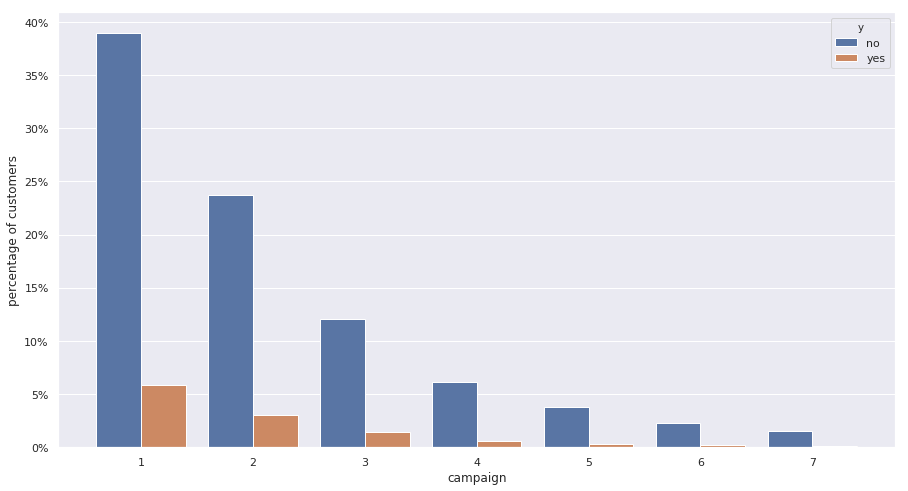

In [0]:
bank_subset_campaign = bank_subset[(bank_subset['campaign'] <= 7)]
barplot_percentages("campaign", bank_subset_campaign)

## We decide to drop columns related to timing because it is out of the scope of our problem statement/ objective.
###We create a new dataset: bank_subset2
 

In [0]:
bank_subset2 = bank_subset.drop(['duration','day_of_week','month'], axis=1)

##Now lets look into job column by parsing segments by 'job'
###*FINDING: A majority number of people contacted were working in 'administrative services', 'blue-collar' , 'services' , or as 'technicians'.*

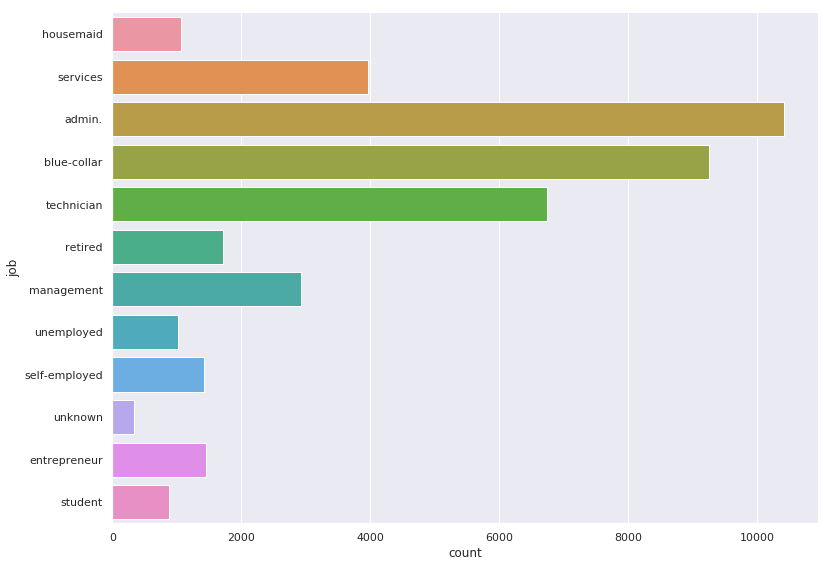

In [0]:
sns.catplot(y="job", kind="count", data=bank, height=7.8, aspect=1.5)

###Exploring further, we found that peoople working in the 'administrative' , 'blue-collar', 'technician' and 'services jobs', were more likely to say 'yes' to the term deposit. 

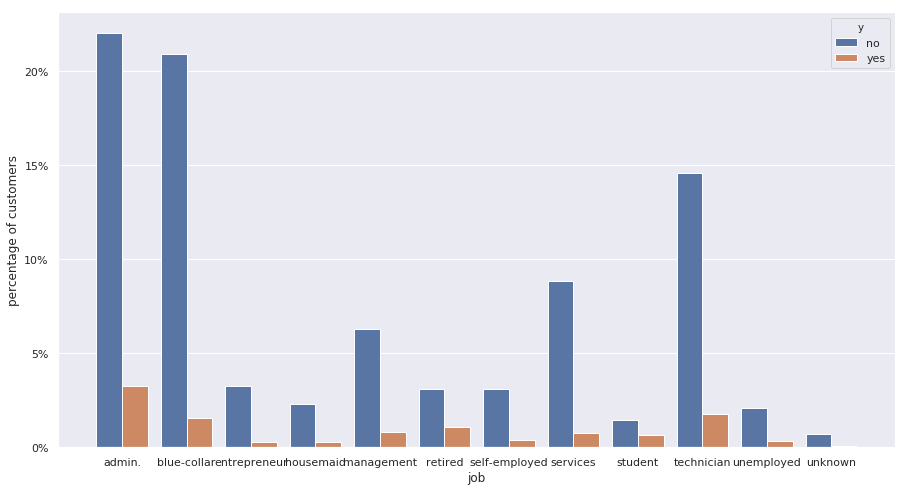

In [7]:
barplot_percentages("job", bank)

###We create dummy variables for 'jobs' to see if there is any correlation with job type and saying yes/ no to bank term deposit, comparing it to 'age' and if that bank had previously contacted them.

In [0]:
bank_subset2_job = pd.get_dummies(bank_subset2, columns=['job'])
bank_subset2_job.head(5)

,age,marital,education,default,housing,loan,contact,campaign,pdays,previous,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,married,basic.4y,no,no,no,telephone,1,999,0,...,0,1,0,0,0,0,0,0,0,0
1,57,married,high.school,unknown,no,no,telephone,1,999,0,...,0,0,0,0,0,1,0,0,0,0
2,37,married,high.school,no,yes,no,telephone,1,999,0,...,0,0,0,0,0,1,0,0,0,0
3,40,married,basic.6y,no,no,no,telephone,1,999,0,...,0,0,0,0,0,0,0,0,0,0
4,56,married,high.school,no,no,yes,telephone,1,999,0,...,0,0,0,0,0,1,0,0,0,0


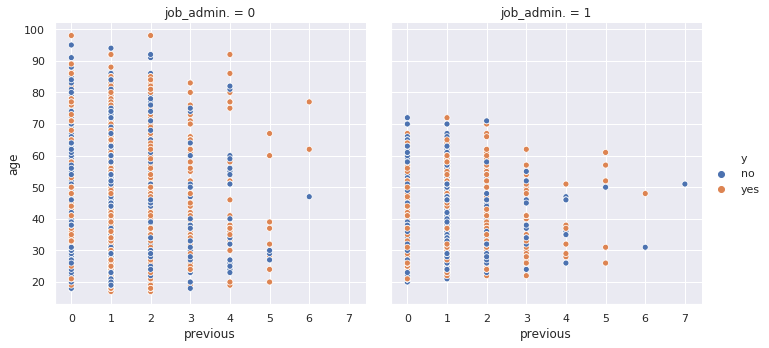

In [0]:
sns.relplot("previous", "age", data=bank_subset2_job, hue='y', col='job_admin.');

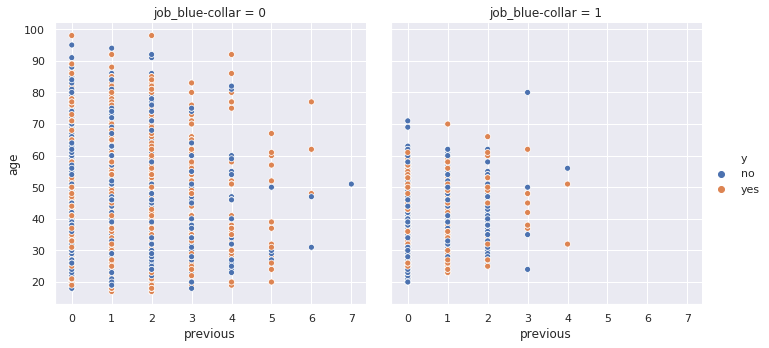

In [0]:
sns.relplot("previous", "age", data=bank_subset2_job, hue='y', col='job_blue-collar');

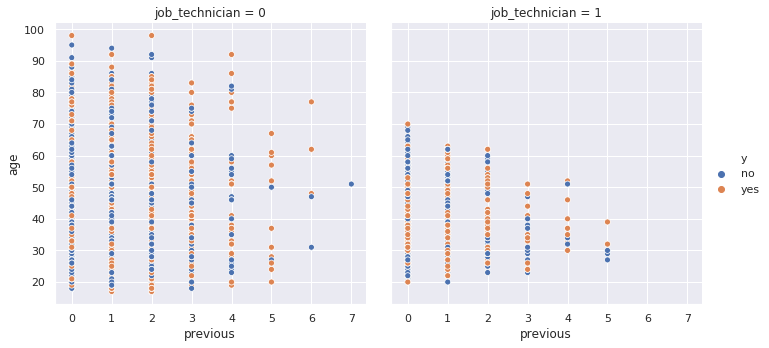

In [0]:
sns.relplot("previous", "age", data=bank_subset2_job, hue='y', col='job_technician');

## *FINDING: We found that type of job -- blue-collar, administrative service, and technician --  has no obvious correlation with saying yes/ no to bank term deposit*

### We reinvestigate 'marital status' column by making barchart to see what percentage of 'married', 'single', or 'divorced' people said yes/ no to a bank term deposit. 

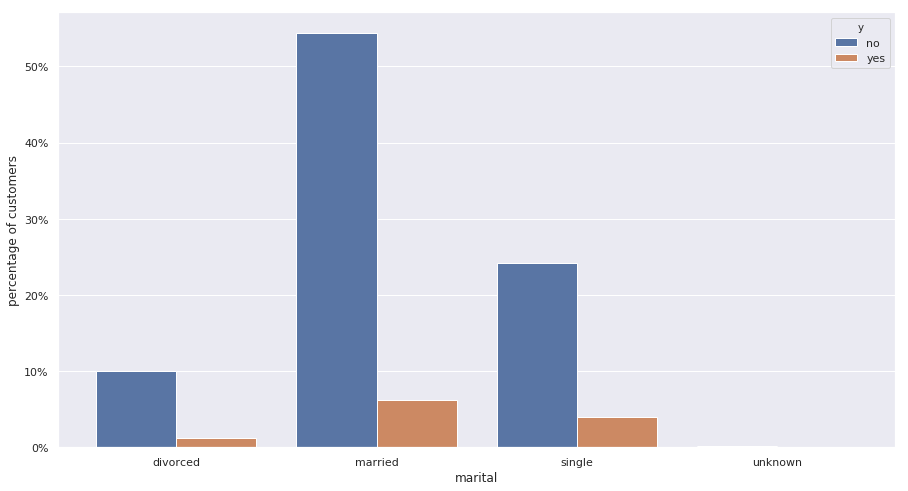

In [0]:
barplot_percentages("marital", bank)
#Percentage of people who said yes or no, based on the three categories of married, single or divorced. 

###We calculate ratios for 'marital status' barchart to see what percentage of each segment said yes v. no.
###*FINDINGS: Single people are most likely to say 'yes' to a bank term deposit than other marital status segments.*

In [0]:
bank_divorced = bank[bank['marital']=='divorced']
bank_divorced_no = bank[(bank['y']=='no') & (bank['marital']=='divorced')]
bank_divorced_yes = bank[(bank['marital']=='divorced') & (bank['y']=='yes')]
divorced_yes_total = bank_divorced_yes.shape[0]/bank_divorced.shape[0]

bank_married = bank[bank['marital']=='married']
bank_married_no = bank[(bank['y']=='no') & (bank['marital']=='married')]
bank_married_yes = bank[(bank['marital']=='married') & (bank['y']=='yes')]
divorced_yes_total = bank_married_yes.shape[0]/bank_married.shape[0]

bank_single = bank[bank['marital']=='single']
bank_single_no = bank[(bank['y']=='no') & (bank['marital']=='single')]
bank_single_yes = bank[(bank['marital']=='single') & (bank['y']=='yes')]
divorced_yes_total = bank_single_yes.shape[0]/bank_single.shape[0]

print("% of divorced yes to total divorced "+str(100*bank_divorced_yes.shape[0]/bank_divorced.shape[0])) # % of divorced people who said yes
print("% of married yes to total married "+str(100*bank_married_yes.shape[0]/bank_married.shape[0]))# % of married people who said yes
print("% of single yes to total single "+str(100*bank_single_yes.shape[0]/bank_single.shape[0]))# % of single people who said yes

% of divorced yes to total divorced 10.320901994796184
% of married yes to total married 10.157252888318357
% of single yes to total single 14.004149377593361


###We wanted to explore % of people who said yes/ no to the bank term deposit based on 'education' level. 
###*FINDINGS: University degree and high school degree holders were more likely to say 'yes' to opening a term deposit account.* 

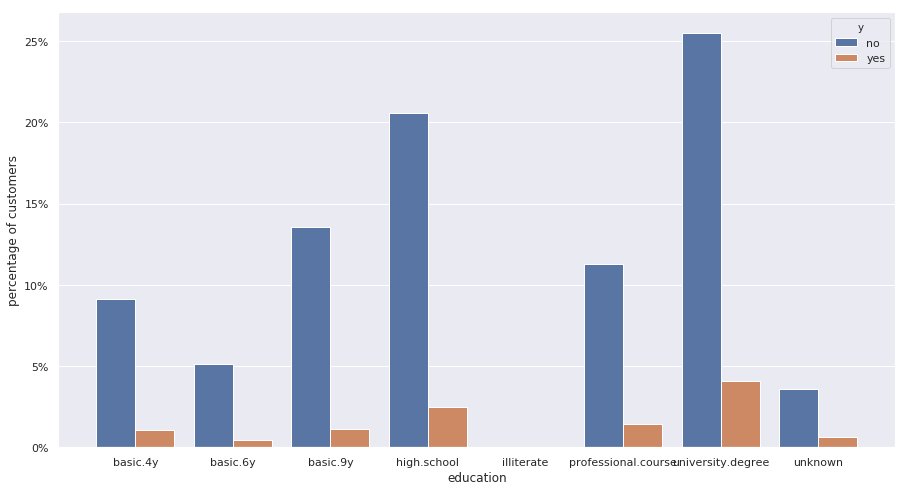

In [0]:
barplot_percentages("education", bank) 

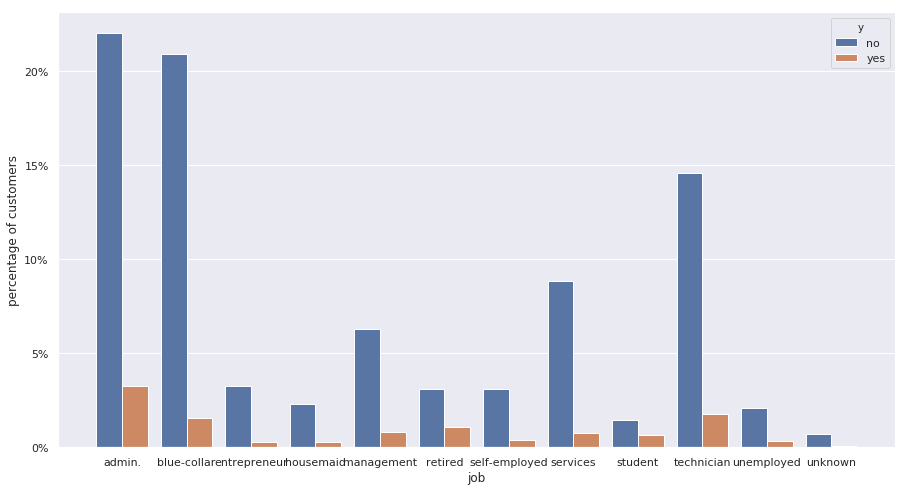

###We then looked into percentage of customers who said yes by age ranges.

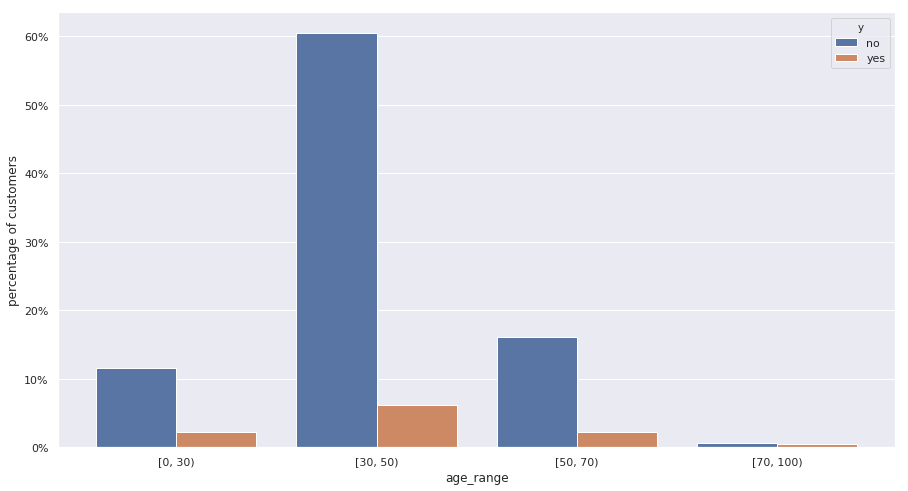

In [0]:
#convert age into range buckets
bank['age_range'] = pd.cut(bank.age, [0,30,50,70,100], right=False)
barplot_percentages("age_range", bank)

##We also exlored customers who said 'yes' to bank term deposit based on duration of call.
####*FINDINGS: The longer the call, the higher the likelihood the customers said 'yes' to bank term deposit.*

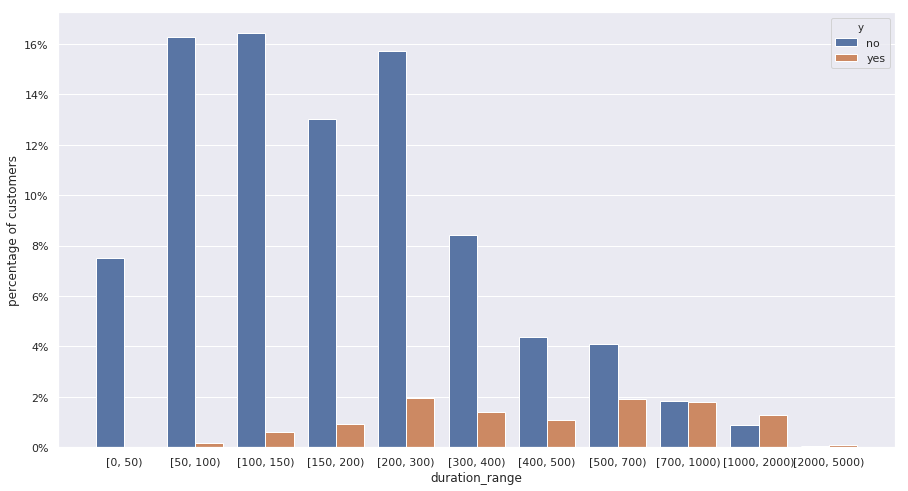

In [0]:
#convert duration in range
bank['duration_range'] = pd.cut(bank.duration, [0,50,100,150,200,300,400,500,700,1000,2000,5000], right=False)
barplot_percentages("duration_range", bank)

###We compared 'job' type to 'duration' of call to see if there was a correlation with response to yes/ no to bank term deposit. 
####*FINDINGS: Students were more likely to say 'yes' when the call was LESS than 700 seconds.*
####*Blue-collar employees were more likely to say 'yes' when the call was LONGER than 700 seconds.*

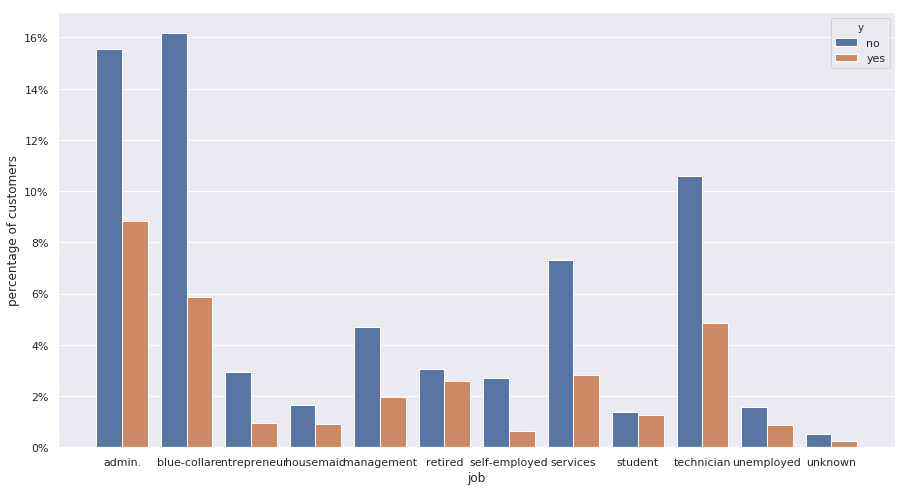

In [0]:
#filter data for say 300,400 500,700 to find employment status of subset
#The duration range was between 500 and 700 seconds for this subplot. 
bank_duration_between_500_700 = bank[(bank['duration'] >=500) & (bank['duration'] < 700)]
barplot_percentages('job', bank_duration_between_500_700)


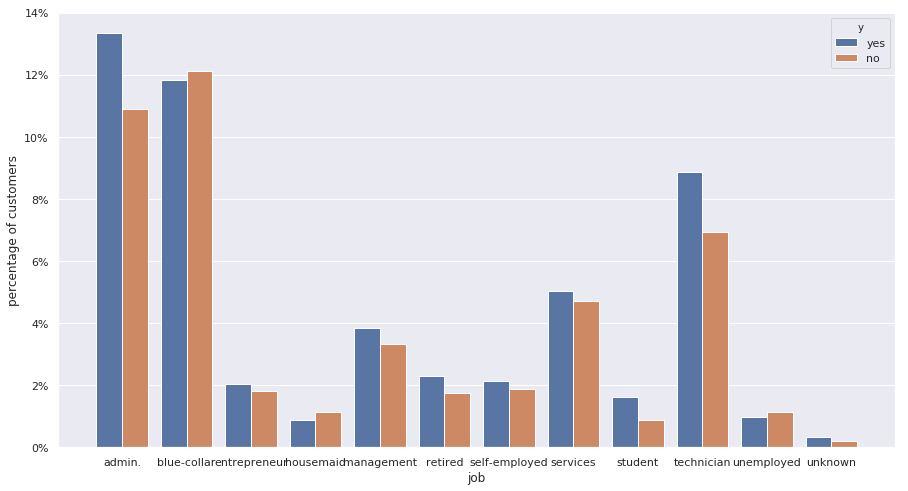

In [0]:
#Duration range between 700 and 5000 seconds for this subplot
bank_duration_between_700_5000 = bank[(bank['duration'] >=700) & (bank['duration'] < 5000)]
barplot_percentages('job', bank_duration_between_700_5000) 



##Explored if 'duration' of call and 'marital status' affected 'y'.

In [0]:
sns.catplot(x="marital", y="duration", hue="y", kind="violin", split=True, palette="pastel", data=bank, height=7.8, aspect=1.5)

NameError: ignored

##Explored if 'job' and 'age' of customers affected 'y'
###*FINDINGS: Inconclusive.*

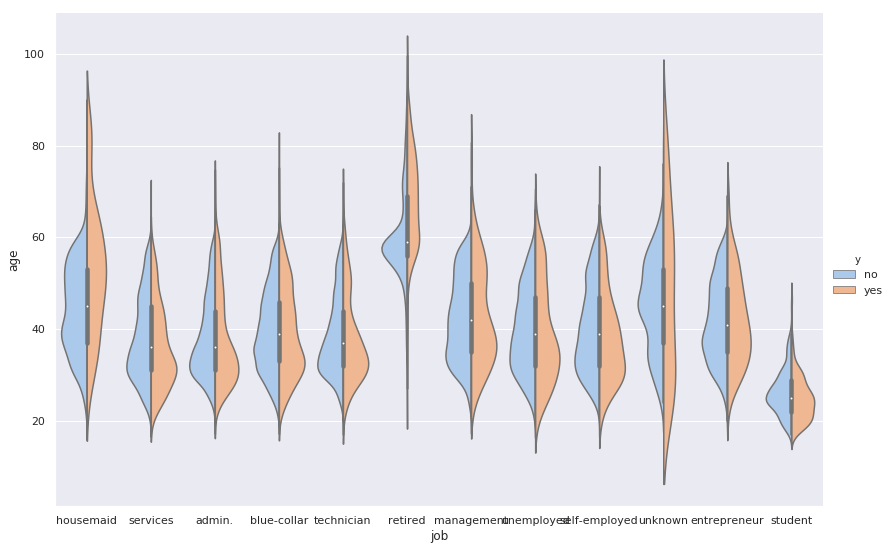

In [0]:
sns.catplot(x="job", y="age", hue="y", kind="violin", split=True, palette="pastel", data=bank, height=7.8, aspect=1.5)


##Explored if 'marital status' and 'age' affected 'y'
###*FINDINGS: 60+ divorced or married people were more likely to say 'yes' to bank term deposit (maybe because they want to talk to someone?)*

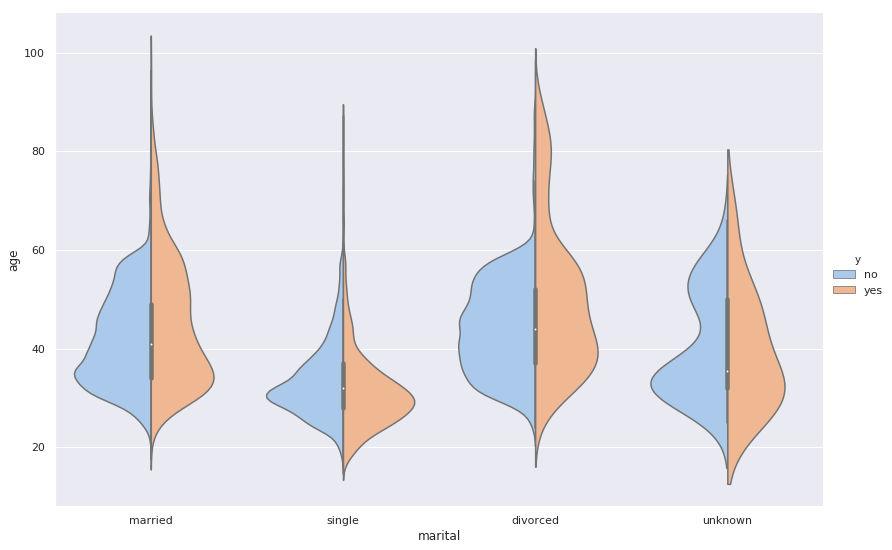

In [0]:
sns.catplot(x="marital", y="age", hue="y", kind="violin", split=True, palette="pastel", data=bank, height=7.8, aspect=1.5)


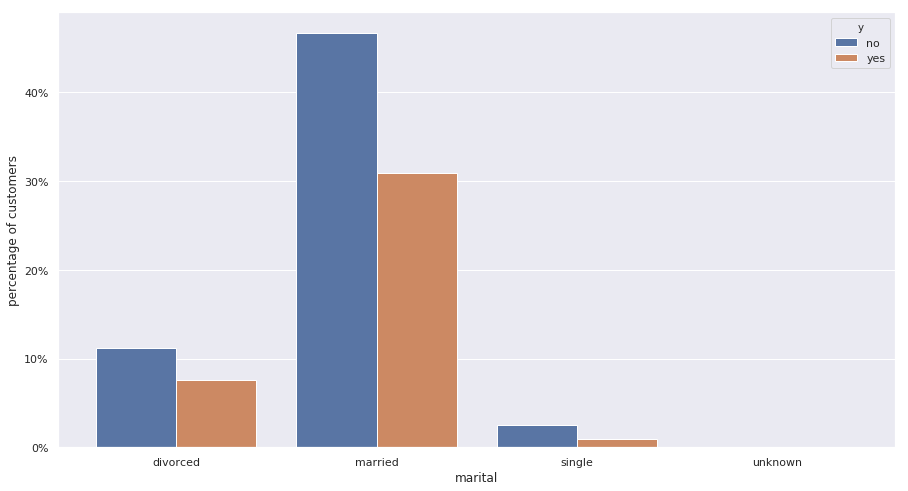

In [0]:
#filter data above age 60 and create chart


bank_age_over_60 = bank[(bank['age'] >=60)]
barplot_percentages('marital', bank_age_over_60)

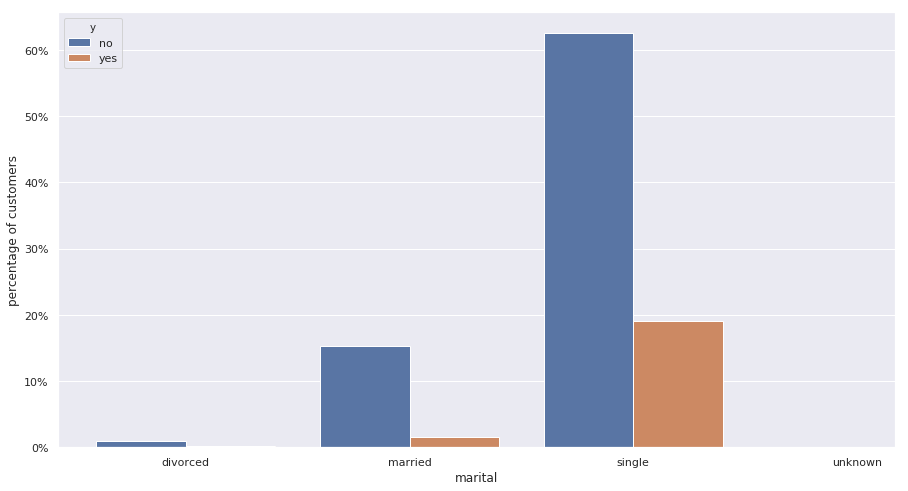

In [0]:
bank_age_under_25 = bank[(bank['age'] <=25)]
barplot_percentages('marital', bank_age_under_25)

###Explored if 'education' level and 'age' affected 'y'
####*FINDINGS: customers with '4y education' ABOVE 60 are more likely to say yes. Customers who identify as 'illiterate' ABOVE 65 and BELOW 25 are most likely to say 'yes' to a bank term deposit account.*

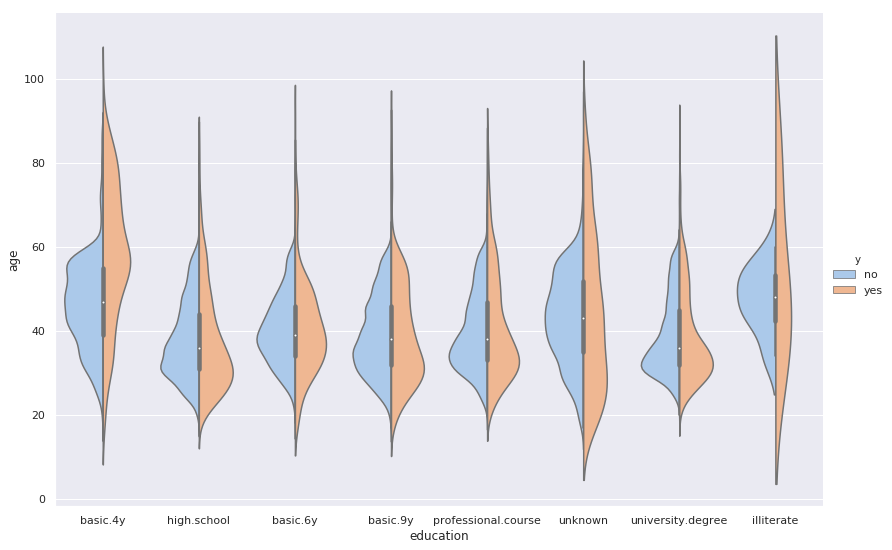

In [0]:
sns.catplot(x="education", y="age", hue="y", kind="violin", split=True, palette="pastel", data=bank, height=7.8, aspect=1.5)

###Explored if 'age' and if customers have a 'current loan' with the bank would affect 'y'.
####*FINDINGS: Customers UNDER 25 and OVER 60 are more likely to say 'yes' to the term deposit REGARDLESS if they already have a current loan with the bank.*

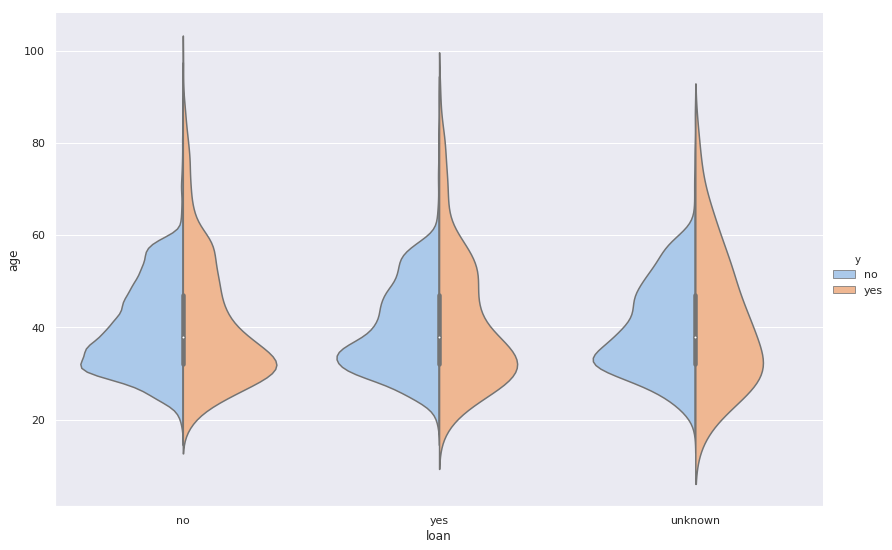

In [0]:
sns.catplot(x="loan", y="age", hue="y", kind="violin", split=True, palette="pastel", data=bank, height=7.8, aspect=1.5)


# Predictive Analysis

In [0]:
bank_subset_dummies = pd.get_dummies(bank_subset2, columns=['job','education','marital','default','housing','loan','contact','poutcome','y'])
bank_subset_dummies.drop(['job_unknown','marital_unknown','education_unknown','default_unknown','housing_unknown','loan_unknown','contact_telephone','poutcome_nonexistent','y_no'], axis=1, inplace=True)
bank_subset_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
age                              41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
education_basic.4y               41188 non-null uint8
education_basic.6y         

### Getting target column and splitting traing and test data

In [0]:
X = bank_subset_dummies.drop('y_yes', axis=1)
Y = bank_subset_dummies['y_yes']

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=69)

## 1. Prediction using LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear') 

### Fit and Prediction

In [0]:
logistic_model.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
logistic_Y_model = logistic_model.predict(Xtest)

In [0]:
logistic_test = Xtest.join(Ytest).reset_index()
logistic_test.join(pd.Series(logistic_Y_model, name='predicted')).head(10)

,index,age,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,poutcome_failure,poutcome_success,y_yes,predicted
0,23793,40,2,999,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,27762,38,5,999,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
2,3343,47,1,999,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1119,35,3,999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,8403,50,4,999,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,16879,43,1,999,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
6,27486,50,1,999,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
7,23407,31,11,999,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
8,10493,43,2,999,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
9,28880,43,2,999,1,1,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0


In [0]:
print("Model coefficients:    ", logistic_model.coef_)
print("Model intercept:", logistic_model.intercept_)

Model coefficients:     [[ 0.00377114 -0.08449582 -0.00230646  0.15824448 -0.09586757 -0.40138385
  -0.20015246 -0.08552912 -0.22439611  0.70517178 -0.1291185  -0.26489595
   0.59727304 -0.24552617  0.07813873 -0.07852364 -0.04476928 -0.25633569
  -0.20576237 -0.00240474 -0.14756698 -0.0511406  -0.21872146 -0.19123972
   0.03477948  0.62137947 -0.0038848  -0.14767281 -0.16309202 -0.09810081
  -0.21266403  0.78197018 -0.08629734 -0.09512996]]
Model intercept: [-0.36757053]


### Finding the accuracy of LogisticRegression Model

In [0]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Ytest, logistic_Y_model)
print("Accuracy of the model: "+str(100*acc) + "%")

Accuracy of the model: 89.56057295460063%


## 2. Prediction using Gaussian Model

### Fit and predict

In [0]:
from sklearn.naive_bayes import GaussianNB 
gaussian_model = GaussianNB()                       
gaussian_model.fit(Xtrain, Ytrain)                  
gaussian_Y_model = gaussian_model.predict(Xtest)  

### Finding the accurancy of Gaussian Model

In [0]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Ytest, gaussian_Y_model)
print("Accuracy of the model: "+str(100*acc) + "%")

Accuracy of the model: 84.73739580804403%
